---

## **Fish Species Clustering and Profiling for Operational Optimization**

### Background:  
**BlueHarvest Aquatics Pvt. Ltd.** is a leading fisheries company engaged in large-scale inland and coastal fishing operations across South Asia. With thousands of fish samples collected daily from various ecosystems, the company aims to streamline its fish classification, storage, and pricing strategies. Presently, the classification of fish is done manually by marine biologists, which is time-consuming, inconsistent, and labor-intensive.

---

### Business Challenge:  
Despite having an extensive catalog of fish measurements, the company lacks an **automated, data-driven system** to identify **natural groupings (clusters)** of fish based on their physical characteristics. This limits their ability to:

- Optimize **cold storage space** based on fish types and sizes  
- Improve **inventory planning** for high-value species  
- Enhance **pricing strategies** by identifying species groups with similar size-weight ratios  
- Identify potential **data anomalies or mislabeled species**

To overcome these challenges, the Data Science team at BlueHarvest is tasked with performing **unsupervised clustering** of fish based on available numerical attributes and profiling the resulting clusters for actionable insights.

---

### Dataset Description:  
The dataset `fish_data.csv` contains **4080 fish samples** and consists of the following columns:

| Column        | Description |
|---------------|-------------|
| `species`     | The scientific name of the fish species (used for validation only; will be excluded during clustering) |
| `length`      | The total length of the fish in centimeters |
| `weight`      | The weight of the fish in kilograms |
| `w_l_ratio`   | The **weight-to-length ratio**, a derived feature representing density or "bulkiness" of the fish, calculated as `weight / length` |

---

### Project Objectives:

The project aims to apply **unsupervised learning (clustering)** techniques on fish data to uncover hidden patterns and natural groupings, following these key steps:

1. **Data Preparation & Cleaning**
   - Load the dataset
   - Handle duplicates
   - Separate features and target (`species`)
   - Standardize the feature variables for clustering

2. **K-Means Clustering**
   - Apply K-Means clustering on the scaled data
   - Predict cluster assignments for each fish sample

3. **Determine Optimal Number of Clusters**
   - Use the **Elbow Method** to analyze inertia (within-cluster variance) for various K values
   - Use the **Silhouette Score** to assess cluster quality and cohesion for K = 2 to 6
   - Visualize the clustering outcome using 2D scatter plots

4. **Hierarchical Clustering (Bonus Step)**
   - Apply **Agglomerative Hierarchical Clustering**
   - Generate a **dendrogram** to visually assess cluster separability and structure

5. **Cluster Profiling**
   - For each cluster identified by K-Means:
     - Compute the **average length, weight, and w_l_ratio**
     - Analyze the distribution of actual species (for validation only)
     - Label clusters based on dominant fish characteristics (e.g., "Lightweight Short Fish", "Heavy Long Fish")

---

### Expected Outcomes:

- A scalable clustering model to automatically categorize new fish based on physical traits  
- Meaningful **cluster profiles** to support downstream business functions like pricing, logistics, and preservation  
- Visual insights for operations and research teams on how fish naturally group together beyond species labels

---

---

## **Evaluation Rubric: Fish Clustering and Profiling Project (Total: 100 Marks)**

| **Section**                             | **Criteria**                                                                 | **Marks** | **Rationale** |
|----------------------------------------|------------------------------------------------------------------------------|-----------|---------------|
| **1. Data Understanding & Cleaning**   | Data loading, previewing, checking for nulls, duplicates, types              | 10        | Good data hygiene is foundational; this step ensures integrity of analysis |
| **2. Feature Engineering**             | Dropping target column, understanding variable relationships, scaling        | 10        | Proper feature selection and scaling directly affect clustering outcomes |
| **3. K-Means Clustering (Initial Run)**| Implementation of KMeans with correct params (e.g., `n_clusters=9`)         | 10        | Core clustering step with initial results |
| **4. Elbow Method Analysis**           | Looping through K values, plotting inertia curve, interpretation             | 10        | Essential to find optimal K and justify model selection |
| **5. Silhouette Score Evaluation**     | Calculating silhouette scores for multiple K values, interpreting results    | 10        | Adds qualitative insight into how well-separated the clusters are |
| **6. Cluster Visualization**           | 2D scatter plots with centroids and labels, colored clusters                 | 10        | Visual clarity is critical for stakeholder communication |
| **7. Hierarchical Clustering (Bonus)** | Generating dendrogram, interpreting linkage, comparing with KMeans           | 10        | Offers an alternate clustering view; tests conceptual depth |
| **8. Cluster Profiling**               | Calculating and interpreting average values, labeling clusters               | 10        | Converts raw clusters into business-meaningful insights |
| **9. Interpretation & Business Insight**| Explaining what clusters imply for inventory, pricing, logistics             | 10        | Bridges technical output to real-world decisions |
| **10. Code Quality & Documentation**   | Clean, modular, well-commented code; use of functions, reproducibility       | 5         | Promotes professional-grade practices |
| **11. Report Structure & Readability** | Logical flow, headings, summary, visuals, minimal jargon                     | 5         | Ensures final output is understandable to non-technical stakeholders |

---

### Total: **100 Marks**

In [32]:
# Make necessary imports
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/prasheelsinha/machine_learning/refs/heads/main/fish_data.csv')

In [34]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [35]:
df.groupby('species')['w_l_ratio'].mean()

,w_l_ratio
species,
Anabas testudineus,0.406176
Coilia dussumieri,0.112988
Otolithoides biauritus,0.173013
Otolithoides pama,0.177149
Pethia conchonius,0.485747
Polynemus paradiseus,0.313231
Puntius lateristriga,0.203254
Setipinna taty,0.174437
Sillaginopsis panijus,0.198264


In [36]:
df.shape

(4080, 4)

In [37]:
df.species.value_counts()

,count
species,
Setipinna taty,480
Anabas testudineus,476
Pethia conchonius,475
Otolithoides biauritus,468
Polynemus paradiseus,458
Sillaginopsis panijus,455
Otolithoides pama,435
Puntius lateristriga,418
Coilia dussumieri,415


In [38]:
df.isnull().sum().sort_values(ascending=False)

,0
species,0
length,0
weight,0
w_l_ratio,0


In [39]:
duplicates = df[df.duplicated()]

In [40]:
duplicates

,species,length,weight,w_l_ratio
50,Anabas testudineus,8.17,3.30,0.40
84,Anabas testudineus,8.31,3.35,0.40
86,Anabas testudineus,7.23,3.31,0.46
204,Anabas testudineus,7.02,3.25,0.46
315,Anabas testudineus,8.98,3.26,0.36
321,Anabas testudineus,7.05,3.24,0.46
328,Anabas testudineus,8.17,3.28,0.40
330,Anabas testudineus,9.59,3.35,0.35
358,Anabas testudineus,8.67,3.31,0.38
383,Anabas testudineus,8.92,3.24,0.36


In [41]:
duplicates.count()

,0
species,109
length,109
weight,109
w_l_ratio,109


In [42]:
df.shape

(4080, 4)

In [43]:
4080 - 109

3971

In [44]:
df.species.value_counts()

,count
species,
Setipinna taty,480
Anabas testudineus,476
Pethia conchonius,475
Otolithoides biauritus,468
Polynemus paradiseus,458
Sillaginopsis panijus,455
Otolithoides pama,435
Puntius lateristriga,418
Coilia dussumieri,415


In [45]:
# Removing 109 duplicates from the dataframe

df = df.drop_duplicates()
df.shape

(3971, 4)

In [46]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [47]:
df.head(1000)

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
5,Anabas testudineus,9.35,3.28,0.35
6,Anabas testudineus,9.42,3.33,0.35
7,Anabas testudineus,7.92,3.13,0.39
8,Anabas testudineus,6.98,3.16,0.45
9,Anabas testudineus,8.42,3.26,0.39


In [48]:
df.describe()

,length,weight,w_l_ratio
count,3971.000000,3971.000000,3971.000000
mean,17.337076,3.728947,0.252110
std,7.066382,1.030543,0.122636
min,6.360000,2.050000,0.080000
25%,11.360000,3.070000,0.170000
50%,17.360000,3.310000,0.190000
75%,22.535000,4.090000,0.340000
max,33.860000,6.290000,0.640000


In [49]:
# features_to_scale = ['length','weight','w_l_ratio']
# sc = StandardScaler()
# df[features_to_scale] = sc.fit_transform(df[features_to_scale])


In [50]:
df.species.value_counts()

,count
species,
Setipinna taty,476
Anabas testudineus,462
Otolithoides biauritus,456
Polynemus paradiseus,454
Pethia conchonius,454
Sillaginopsis panijus,429
Otolithoides pama,428
Coilia dussumieri,409
Puntius lateristriga,403


In [51]:
df.describe()

,length,weight,w_l_ratio
count,3971.000000,3971.000000,3971.000000
mean,17.337076,3.728947,0.252110
std,7.066382,1.030543,0.122636
min,6.360000,2.050000,0.080000
25%,11.360000,3.070000,0.170000
50%,17.360000,3.310000,0.190000
75%,22.535000,4.090000,0.340000
max,33.860000,6.290000,0.640000


In [52]:
df.head(5)

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [53]:
X = df.iloc[:,[1,2]]
X.head(10)

,length,weight
0,10.66,3.45
1,6.91,3.27
2,8.38,3.46
3,7.57,3.36
4,10.83,3.38
5,9.35,3.28
6,9.42,3.33
7,7.92,3.13
8,6.98,3.16
9,8.42,3.26


# Performing Hopkins Statistics to check cluster tendency

In [54]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X): # X must be a DataFrame
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [55]:
hopkins(X)

np.float64(0.9708013677651052)

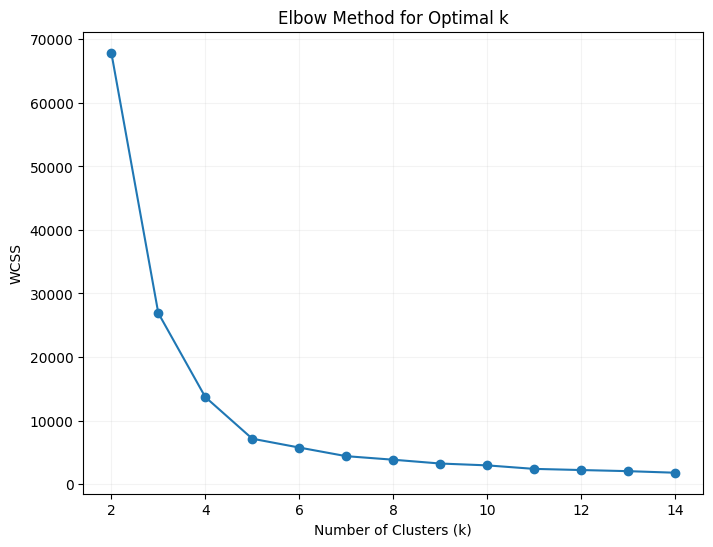

In [56]:
# Elbow Method to find optimal number of clusters
from sklearn.cluster import KMeans

wcss = [] # Within-Cluster Sum of Squares
for k in range(2, 15):  # Testing for k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(alpha=0.15)
plt.show()

Silhouette score for 2= 0.567
Silhouette score for 3= 0.631
Silhouette score for 4= 0.616
Silhouette score for 5= 0.619
Silhouette score for 6= 0.578
Silhouette score for 7= 0.549
Silhouette score for 8= 0.529
Silhouette score for 9= 0.509
Silhouette score for 10= 0.487
Silhouette score for 11= 0.478
Silhouette score for 12= 0.479
Silhouette score for 13= 0.488
Silhouette score for 14= 0.475


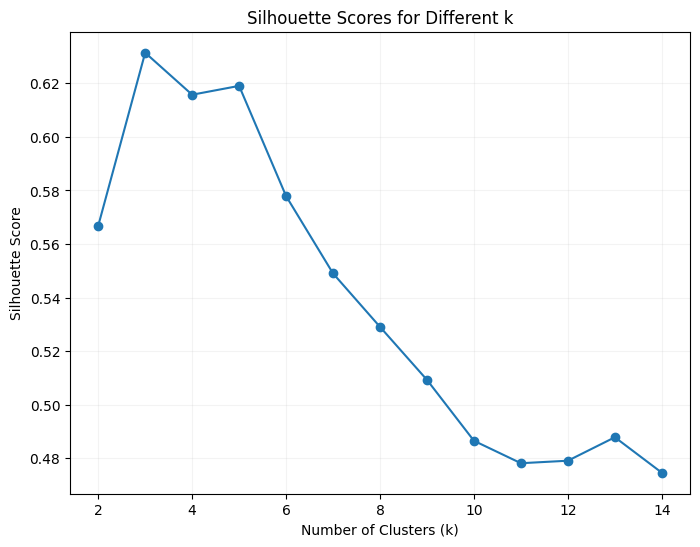

In [57]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f"Silhouette score for {k}= {score:.3f}")
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(alpha=0.15)
plt.show()

#42 - 9
#13 - 8


Cluster Centers:

[[18.28878987  3.24744841]
 [ 8.77543764  3.84576586]
 [23.51589041  3.22286301]
 [31.07202797  6.1432634 ]
 [13.0197476   3.41669471]]

Labels assigned to each data point:

[1 1 1 ... 3 3 3]


/tmp/ipython-input-2395496113.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_.astype(str)


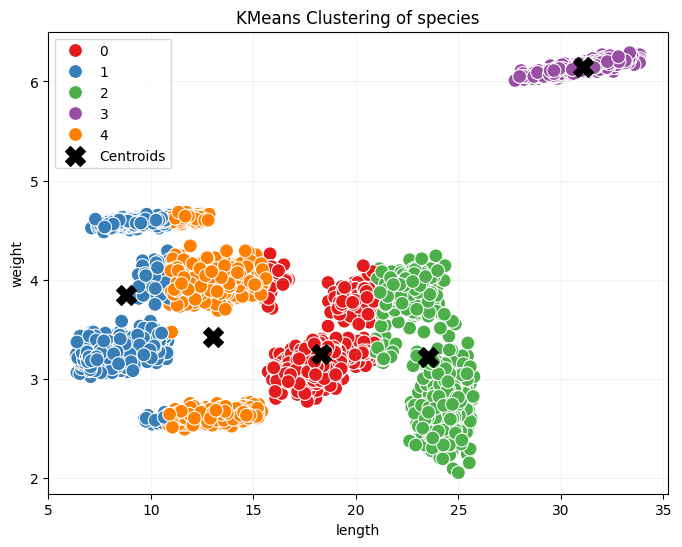

In [58]:
# # Implementing KMeans clustering
from sklearn.cluster import KMeans
import seaborn as sns
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X) # X is a numpy array

custom_palette = {
    '0': '#e41a1c',  # red
    '1': '#377eb8',  # blue
    '2': '#4daf4a',  # green
    '3': '#984ea3',  # purple
    '4': '#ff7f00',  # orange
    '5': '#ffff33',  # yellow
    '6': '#a65628',  # brown
    '7': '#f781bf',  # pink
    '8': '#999999'   # gray
}

# # Printing the cluster centers
print("\nCluster Centers:\n")
print(kmeans.cluster_centers_)

# # Print the labels assigned to each data point
print("\nLabels assigned to each data point:\n")
print(kmeans.labels_)
X['Cluster'] = kmeans.labels_.astype(str)
# #Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="length", y="weight", hue="Cluster", hue_order = sorted(X['Cluster'].unique()), data=X, palette=custom_palette, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('KMeans Clustering of species')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(loc='best')
plt.grid(alpha=0.15)
plt.show()

In [59]:
cluster_map = {
    '0': 'Mid-Size Mid-Wt',
    '1': 'Mid-Size Below Mid-Wt',
    '2': 'Xtra Small-Size Above Mid-Wt',
    '3': 'Big-Size Heavy Wt',
    '4': 'Small-Size Above Mid-Wt',
    '5': 'Xtra Small-Size Below Mid-Wt',
    '6': 'Small-Size Light-Wt',
    '7': 'Large-Size Below Mid-Wt',
    '8': 'Large-Size Light-Wt'
}

X['Cluster_Class'] = X['Cluster'].map(cluster_map)
X.head()

,length,weight,Cluster,Cluster_Class
0,10.66,3.45,1,Mid-Size Below Mid-Wt
1,6.91,3.27,1,Mid-Size Below Mid-Wt
2,8.38,3.46,1,Mid-Size Below Mid-Wt
3,7.57,3.36,1,Mid-Size Below Mid-Wt
4,10.83,3.38,1,Mid-Size Below Mid-Wt


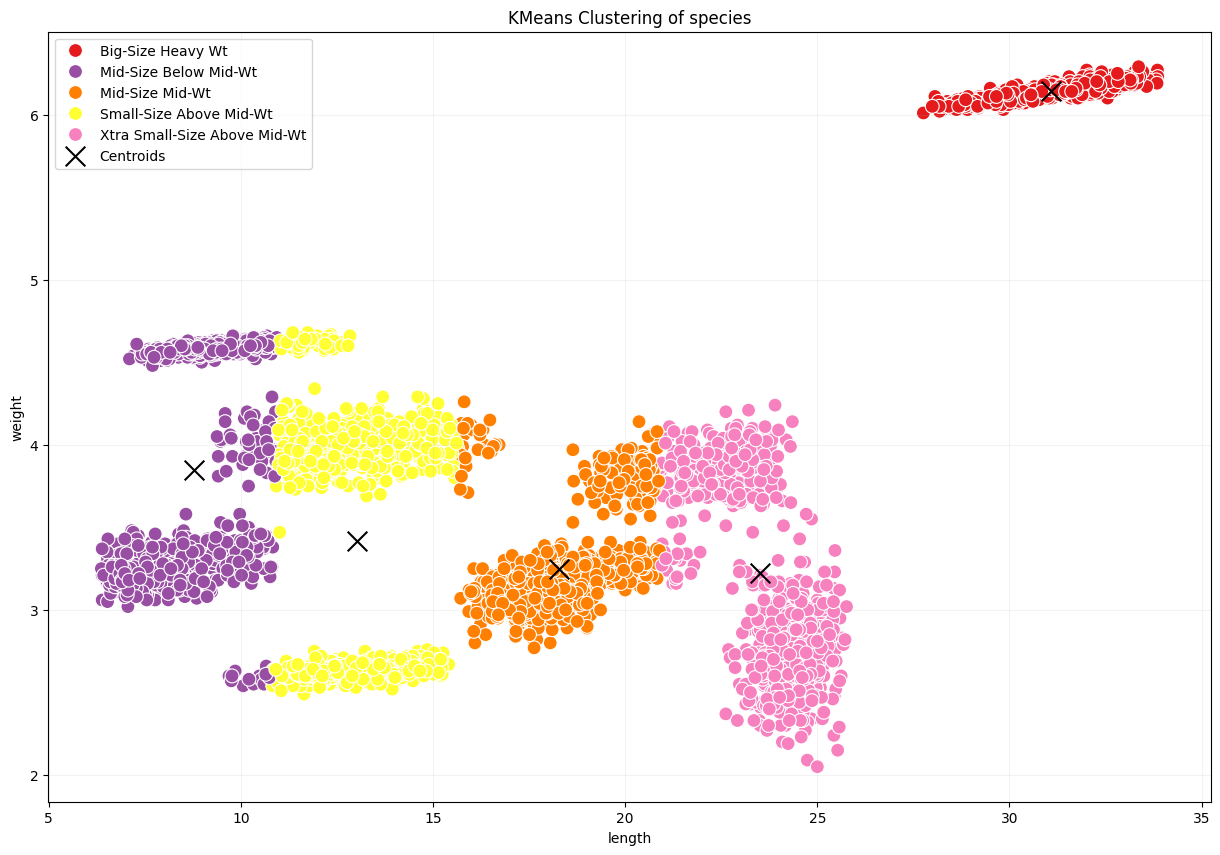

In [60]:
# #Plotting the hierarchical clusters

custom_palette = {
    'Big-Size Heavy Wt': '#e41a1c',  # red
    'Large-Size Below Mid-Wt': '#377eb8',  # blue
    'Large-Size Light-Wt': '#4daf4a',  # green
    'Mid-Size Below Mid-Wt': '#984ea3',  # purple
    'Mid-Size Mid-Wt': '#ff7f00',  # orange
    'Small-Size Above Mid-Wt': '#ffff33',  # yellow
    'Small-Size Light-Wt': '#a65628',  # brown
    'Xtra Small-Size Above Mid-Wt': '#f781bf',  # pink
    'Xtra Small-Size Below Mid-Wt': '#999999'   # gray
}

plt.figure(figsize=(15, 10))
sns.scatterplot(x="length", y="weight", hue="Cluster_Class", hue_order = sorted(X['Cluster_Class'].unique()), data=X, palette=custom_palette, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.title('KMeans Clustering of species')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(loc='best')
plt.grid(alpha=0.15)
plt.show()